## Introdução

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [296]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [297]:
'''Load CSVs'''
energia_2021 = pd.read_csv('./competition/energia_202109-202112.csv')
energia_2022 = pd.read_csv('./competition/energia_202201-202212.csv')
meteo_2021 = pd.read_csv('./competition/meteo_202109-202112.csv')
meteo_2022 = pd.read_csv('./competition/meteo_202201-202212.csv')
teste_meteo_2023 = pd.read_csv('./competition/meteo_202301-202304.csv')
teste_energia_2023 = pd.read_csv('./competition/energia_202301-202304.csv')


## Análise dos Dados

### Datasets Energia

In [298]:
energia_2021.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [299]:
energia_2022.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [300]:
energia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


In [301]:
energia_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Económico (kWh)  8760 non-null   float64
 4   Autoconsumo (kWh)        8760 non-null   float64
 5   Injeção na rede (kWh)    2673 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 410.8+ KB


#### Full Join dos datasets Energia 2021 e Energia 2022

In [302]:
energia_21 = energia_2021.copy()
energia_22 = energia_2022.copy() 
energia = pd.merge(energia_21, energia_22, how="outer", on=['Data', 'Hora','Normal (kWh)','Horário Económico (kWh)','Autoconsumo (kWh)','Injeção na rede (kWh)'])
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 516.5+ KB


### Dataset Meteorologia 

In [303]:
meteo_2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [304]:
meteo_2022.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.15,NaN,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.14,NaN,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,NaN,NaN,66,3.12,NaN,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,NaN,NaN,67,3.08,NaN,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,NaN,NaN,67,3.12,NaN,15,few clouds


In [305]:
meteo_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [306]:
meteo_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             8760 non-null   int64  
 11  wind_speed           8760 non-null   float64
 12  rain_1h              1898 non-null   float64
 13  clouds_all           8760 non-null   int64  
 14  weather_description  8760 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

#### Full Join dos datasets Meteorologia 2021 e Meteorologia 2022

In [307]:
meteo_21 = meteo_2021.copy()
meteo_22 = meteo_2022.copy() 
meteo = pd.merge(meteo_21, meteo_22, how="outer", on=['dt','dt_iso','city_name','temp', 'feels_like', 'temp_min', 'temp_max' , 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'])
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   11688 non-null  int64  
 1   dt_iso               11688 non-null  object 
 2   city_name            11688 non-null  object 
 3   temp                 11688 non-null  float64
 4   feels_like           11688 non-null  float64
 5   temp_min             11688 non-null  float64
 6   temp_max             11688 non-null  float64
 7   pressure             11688 non-null  int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             11688 non-null  int64  
 11  wind_speed           11688 non-null  float64
 12  rain_1h              2435 non-null   float64
 13  clouds_all           11688 non-null  int64  
 14  weather_description  11688 non-null  object 
dtypes: float64(8), int64(4), object(3)
m

### Inner Join dos datasets Energia e Meteorologia

#### Criação de uma coluna Timestamp no Dataset Energia 

Junção das colunas 'Data' e 'Hora' para criar a coluna 'Data_Hora'

In [308]:
energia['Data_Hora'] = energia['Data'] + ":" + energia['Hora'].astype(str)
energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora
0,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0
1,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1
2,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2
3,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3
4,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4


Criação da coluna 'dt' com timetamps a partir da coluna 'Data_Hora'

In [309]:
energia['dt'] = energia['Data_Hora'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d:%H').timestamp()).astype('int64')
energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora,dt
0,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0,1632873600
1,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1,1632877200
2,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2,1632880800
3,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3,1632884400
4,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4,1632888000


Provar que ambas as colunas são iguais

In [310]:
energia_1 = energia.copy()

In [311]:
# Converter para datetime a coluna dt
energia_1['dt'] = pd.to_datetime(energia_1['dt'], unit='s', utc=True)
energia_1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora,dt
0,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0,2021-09-29 00:00:00+00:00
1,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1,2021-09-29 01:00:00+00:00
2,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2,2021-09-29 02:00:00+00:00
3,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3,2021-09-29 03:00:00+00:00
4,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4,2021-09-29 04:00:00+00:00


In [312]:
# Criação de duas colunas, Data2 e Hora2, a partir da coluna dt
energia_1["Data2"] = energia_1["dt"].dt.date.astype("datetime64[ns]")
assert energia_1['Data2'].isnull().sum() == 0, 'missing Data'

energia_1["Hora2"] = energia_1["dt"].dt.hour.astype('int64')
assert energia_1['Hora2'].isnull().sum() == 0, 'missing Data'    # acho que isto só faz senti com o errors='coerce'

# Converte a coluna Data para o tipo datetime para futura comparação com a coluna Data2
energia_1["Data"] = energia_1["Data"].astype("datetime64[ns]")

In [313]:
# Verificar se as colunas são exatamente iguais
print(energia_1['Data2'].equals(energia_1['Data']))
print(energia_1['Hora2'].equals(energia_1['Hora']))

True
True


Junção dos dataset Energia e Meteorologia utilizando a coluna 'dt'

In [314]:
e_m = pd.merge(meteo, energia, how="inner", on= 'dt')

### Análise dos Dados do novo dataset

In [315]:
e_m.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora
0,1632873600,2021-09-29 00:00:00 +0000 UTC,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,...,NaN,87,overcast clouds,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0
1,1632877200,2021-09-29 01:00:00 +0000 UTC,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,...,NaN,91,overcast clouds,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1
2,1632880800,2021-09-29 02:00:00 +0000 UTC,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2
3,1632884400,2021-09-29 03:00:00 +0000 UTC,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,...,NaN,95,overcast clouds,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3
4,1632888000,2021-09-29 04:00:00 +0000 UTC,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4


In [316]:
e_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dt                       11016 non-null  int64  
 1   dt_iso                   11016 non-null  object 
 2   city_name                11016 non-null  object 
 3   temp                     11016 non-null  float64
 4   feels_like               11016 non-null  float64
 5   temp_min                 11016 non-null  float64
 6   temp_max                 11016 non-null  float64
 7   pressure                 11016 non-null  int64  
 8   sea_level                0 non-null      float64
 9   grnd_level               0 non-null      float64
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  rain_1h                  2284 non-null   float64
 13  clouds_all               11016 non-null  int64  
 14  weather_description   

In [317]:
'''
Verificar a quantidade de Missing Values no dataset
'''
print(e_m.isnull().sum()) 

dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
Data_Hora                      0
dtype: int64


<Axes: >

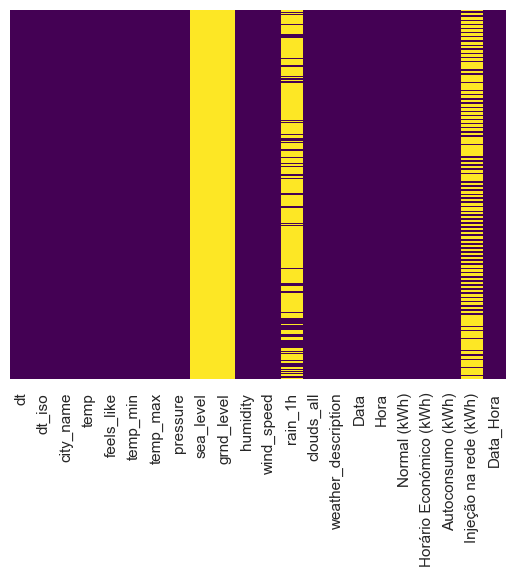

In [318]:
sns.heatmap(e_m.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [319]:
'''
Verificar a quantidade de valores únicos em cada feature
'''
e_m.nunique()

#for field in energia_2021:
#    print(f"{field}: {energia_2021[field].duplicated().sum()}")

dt                         11016
dt_iso                     11016
city_name                      1
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
sea_level                      0
grnd_level                     0
humidity                      82
wind_speed                   771
rain_1h                      367
clouds_all                   101
weather_description            8
Data                         459
Hora                          24
Normal (kWh)                1282
Horário Económico (kWh)      851
Autoconsumo (kWh)            752
Injeção na rede (kWh)          4
Data_Hora                  11016
dtype: int64

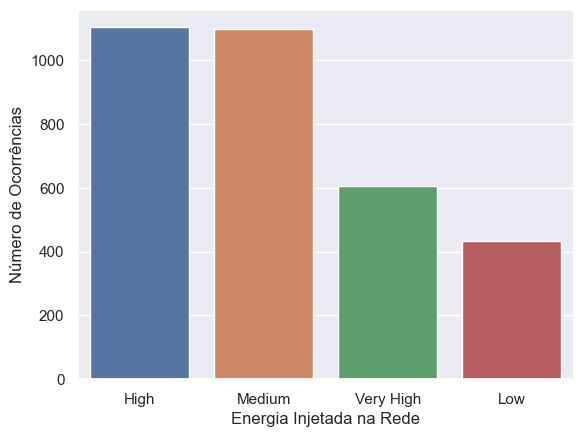

In [320]:
'''
Analisar a feature "Injeção na Rede"
'''

e_m_count = e_m["Injeção na rede (kWh)"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=e_m_count.index, y=e_m_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Energia Injetada na Rede', fontsize=12)
plt.show()

In [321]:
e_m.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
count,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,0.0,0.0,11016.000000,11016.000000,2284.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,NaN,NaN,76.570715,2.672039,0.896642,54.000908,11.500000,0.202278,0.159714,0.117314
std,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,NaN,NaN,16.268260,1.476158,1.079381,40.553002,6.922501,0.349478,0.271792,0.176762
min,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,NaN,NaN,66.000000,1.620000,0.210000,7.000000,5.750000,0.000000,0.000000,0.000000
50%,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,NaN,NaN,81.000000,2.400000,0.460000,60.000000,11.500000,0.000000,0.000000,0.000000
75%,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,NaN,NaN,91.000000,3.420000,1.092500,98.000000,17.250000,0.314000,0.288000,0.227000
max,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000,23.000000,3.251000,6.978000,1.192000


In [322]:
#print(f"Skewness: \n{e_m.skew()}")
#print(f"\nKurtosis: \n{e_m.kurt()}")

## Tratamento dos Dados

### Simplificação dos nomes das features

In [323]:
e_m.rename(columns={"dt": "Timestamp"}, inplace=True)
e_m.rename(columns={"temp": "Temperatura"}, inplace=True)
e_m.rename(columns={"feels_like": "Sensação Térmica"}, inplace=True)
e_m.rename(columns={"temp_min": "Temperatura Mínima"}, inplace=True)
e_m.rename(columns={"temp_max": "Temperatura Máxima"}, inplace=True)
e_m.rename(columns={"pressure": "Pressão Atmosférica"}, inplace=True)
e_m.rename(columns={"humidity": "Humidade (%)"}, inplace=True)
e_m.rename(columns={"wind_speed": "Velocidade Vento"}, inplace=True)
e_m.rename(columns={"rain_1h": "Precipitação Média"}, inplace=True)
e_m.rename(columns={"clouds_all": "Nebulosidade (%)"}, inplace=True)
e_m.rename(columns={"weather_description": "Estado do Tempo"}, inplace=True)
e_m.rename(columns={"Normal (kWh)": "Normal"}, inplace=True)
e_m.rename(columns={"Horário Económico (kWh)": "Horário Económico"}, inplace=True)
e_m.rename(columns={"Autoconsumo (kWh)": "Autoconsumo"}, inplace=True)
e_m.rename(columns={"Injeção na rede (kWh)": "Injeção na rede"}, inplace=True)

e_m.head()

,Timestamp,dt_iso,city_name,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,sea_level,grnd_level,...,Precipitação Média,Nebulosidade (%),Estado do Tempo,Data,Hora,Normal,Horário Económico,Autoconsumo,Injeção na rede,Data_Hora
0,1632873600,2021-09-29 00:00:00 +0000 UTC,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,...,NaN,87,overcast clouds,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0
1,1632877200,2021-09-29 01:00:00 +0000 UTC,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,...,NaN,91,overcast clouds,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1
2,1632880800,2021-09-29 02:00:00 +0000 UTC,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2
3,1632884400,2021-09-29 03:00:00 +0000 UTC,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,...,NaN,95,overcast clouds,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3
4,1632888000,2021-09-29 04:00:00 +0000 UTC,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4


### Remoção de features

Remoção de colunas com apenas 1 valor único ou com a totalidade dos seus registos representados por Missing Values

In [324]:
e_m.drop(['city_name','sea_level','grnd_level'], axis=1, inplace=True)
e_m.columns

Index(['Timestamp', 'dt_iso', 'Temperatura', 'Sensação Térmica',
       'Temperatura Mínima', 'Temperatura Máxima', 'Pressão Atmosférica',
       'Humidade (%)', 'Velocidade Vento', 'Precipitação Média',
       'Nebulosidade (%)', 'Estado do Tempo', 'Data', 'Hora', 'Normal',
       'Horário Económico', 'Autoconsumo', 'Injeção na rede', 'Data_Hora'],
      dtype='object')

Remoção da coluna 'Data_Hora', 'Data' e 'Hora' visto que agora são representadas pela coluna 'dt'

In [325]:
e_m.drop(['Data_Hora','Data','Hora'], axis=1, inplace=True)
e_m.columns

Index(['Timestamp', 'dt_iso', 'Temperatura', 'Sensação Térmica',
       'Temperatura Mínima', 'Temperatura Máxima', 'Pressão Atmosférica',
       'Humidade (%)', 'Velocidade Vento', 'Precipitação Média',
       'Nebulosidade (%)', 'Estado do Tempo', 'Normal', 'Horário Económico',
       'Autoconsumo', 'Injeção na rede'],
      dtype='object')

In [326]:
#e_m.drop(['Ano','Data'],axis=1,inplace=True)
#e_2021_1.dropna(inplace=True)

In [327]:
#m_2021_1.drop(['city_name','sea_level','grnd_level','dt_iso','Ano','Minuto','Segundo','Timezone','dt'], axis=1, inplace=True)
#m_2021_1.head()

### Alteração de datas

Converter o tipo de dados da coluna 'dt_iso' para datetime

In [328]:
e_m_1 = e_m.copy()
e_m_1['dt_iso'] = pd.to_datetime(e_m_1['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC', errors='coerce')
assert e_m_1['dt_iso'].isnull().sum() == 0, 'missing dt_iso'
e_m_1['dt_iso'].head()

0   2021-09-29 00:00:00+00:00
1   2021-09-29 01:00:00+00:00
2   2021-09-29 02:00:00+00:00
3   2021-09-29 03:00:00+00:00
4   2021-09-29 04:00:00+00:00
Name: dt_iso, dtype: datetime64[ns, UTC]

Converter o tipo de dados da coluna 'Timestamp' para datetime

In [329]:
e_m_1['Timestamp'] = pd.to_datetime(e_m_1['Timestamp'], unit='s', utc=True)
e_m_1['Timestamp'].head()

0   2021-09-29 00:00:00+00:00
1   2021-09-29 01:00:00+00:00
2   2021-09-29 02:00:00+00:00
3   2021-09-29 03:00:00+00:00
4   2021-09-29 04:00:00+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

Verificar se as colunas são exatamente iguais

In [330]:
print(e_m_1['Timestamp'].equals(e_m_1['dt_iso']))

True


Remoção da coluna 'dt_iso' do dataset original (vale a pena fazer a cópia?)

In [331]:
e_m.drop(['dt_iso'], axis=1, inplace=True)
e_m.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade (%),Velocidade Vento,Precipitação Média,Nebulosidade (%),Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na rede
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,NaN
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,NaN
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,NaN
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,NaN
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,NaN


### Converter tipos de dados categóricos para numéricos

In [332]:
e_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            11016 non-null  int64  
 1   Temperatura          11016 non-null  float64
 2   Sensação Térmica     11016 non-null  float64
 3   Temperatura Mínima   11016 non-null  float64
 4   Temperatura Máxima   11016 non-null  float64
 5   Pressão Atmosférica  11016 non-null  int64  
 6   Humidade (%)         11016 non-null  int64  
 7   Velocidade Vento     11016 non-null  float64
 8   Precipitação Média   2284 non-null   float64
 9   Nebulosidade (%)     11016 non-null  int64  
 10  Estado do Tempo      11016 non-null  object 
 11  Normal               11016 non-null  float64
 12  Horário Económico    11016 non-null  float64
 13  Autoconsumo          11016 non-null  float64
 14  Injeção na rede      3239 non-null   object 
dtypes: float64(9), int64(4), object(2)
m

Injeção na rede

In [333]:
# Factorize


In [334]:
# One-Hot encoding


weather_description

In [335]:
# Factorize


In [336]:
# One-Hot encoding


### Tratamento de Outliers

### Tratamento de Missing Values

### Normalizar?

### Exploratory Data Analysis 

In [337]:
#fig = plt.figure(figsize = (10,10))
#incidents_corr = m_2021_1.corr(method = 'pearson')
#sns.heatmap(incidents_corr, linecolor = 'black', linewidths = 0.5)

In [338]:
#-sns.pairplot(m_2021_1)